#### Copyright 2019 Google LLC.

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Probability

Probabilistic functions are responsible for many algorithms used in both traditional programming, and machine learning applications.  This module discusses the differences between Frequentist and Bayesian approaches, and why probability is not always what it seems.

- Basic Probability
- Conditional Probability
- Frequentist vs. Bayesian
- Bayes' Theorem
- Monty Hall Problem
- Estimation


## Overview

### Learning Objectives

 * Understand what probability is, and how to use it as a Data Scientist.
 * How to design an experiment around independence.
 * Be able to code up simple experiments using ```random``` and ```scipy```
 * How do frequentists' measure of probability differ from Bayesians?
 * Know how to solve the cookie problem using Bayes' Rule or Theorem.
 * Apply Bayesian Statistics to solve the Monty Hall Problem.
 * Estimate the probability of a certain outcome of an experiment.

### Prerequisites

* Intermediate Python
* Pandas
* Visualizations

### Estimated Duration

90 minutes

### Load Packages

In [2]:
%matplotlib inline

import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Basic Probability

If probability is just a number between 0 and 1, what are the odds of getting heads when you flip a coin?  Most would say 50%, and that is just an estimate for an experiment in which you flip exactly one coin.

$P(Heads)=1/2$

In the case of a coin flip, the probability of the event heads is 50%.  We could then estimate that if we flip a coin 1000 times, we will get 500 heads. Most of the time we will not get 500, but the results of the coin flip experiment show that we come pretty close. Perhaps this deviation from our estimate could be due to some bias, or simply random noise.  We can however expect that most of the time our experiment will yield a fairly even split.




## Independence and Dependence

Two or more events can either be independent of, or dependent on one or more prior events. When thinking like a data scientist, it is important to take note of the sequence of events, especially when designing an experiment.  Assuming that two events are independent is a convenience that is used in statistics so we can test our hypotheses.  However, if there is significant evidence that two events are not independent, then it is imperative to determine their order of dependence, as well as their conditional independence. Some events happen in their own chronological order, while others happen as a result of some other trigger.  





## Conditional Probability 

When thinking about conditional probability, it is important to consider independence versus dependence.  Say you had a bag of marbles with 5 red and 5 blue.  To prove that conditional probability works, you can experiment by drawing marbles with and without replacement.

### Marbles with replacement
First experiment with independent events by using replacement. That is,in each situation below a marble is drawn, put back in the bag, and a second marble is then drawn. What is the probability that you: 

1. Draw either a blue or red?
2. Draw a red followed by a blue?
3. Draw two blues in a row?

The answers are:

1. $P(Blue) = P(Red) =1/2$

2. $P(Blue \cap  Red) = P(Red) * P(Blue) = 1/4$

3. $P(Blue \cap Blue) = P(Blue) * P(Blue) = 1/4$

We can simulate the act of drawing a single marble as follows: 

In [3]:
BagA=5*['Red']+5*['Blue']
np.random.choice(BagA)

'Red'

The act of drawing two marbles, with replacement, is done by:

In [4]:
np.random.choice(BagA,2,replace=True)

array(['Blue', 'Blue'], dtype='<U4')

### Marbles without replacement

The probability of drawing a blue marble, given that you've already drawn a red marble is as follows:
$P(Blue \mid Red) = 5/(10-1) = 5/9$

Since we have already seen that the probability of having initially drawn the red marble was $1/2$. Hence, the proability of choosing red-then-blue with no replacement is calculated as 

$P(Red \cap Blue)=1/2 \cdot 5/9 =5/18$

Similarly, the probability of drawing a red marble, given that you've already drawn a red marble is as follows:
$P(Red \mid Red) = 4/(10-1) = 4/9$

Hence, 
$P(Red \cap Red)=1/2 \cdot 4/9 =2/9$

We can summarize this as follows. The probability of two **dependent** events, $A$ and $B$, happening is 

$P(A \cap B) = P(A) * P(B \mid A)$


The act of drawing two marbles, without replacement, is simulated by:

In [5]:
np.random.choice(BagA,2,replace=False)

array(['Blue', 'Blue'], dtype='<U4')

We can now check that $P(Red \cap Red)=2/9=0.222...$ by simulating 10000 runs:

In [6]:
sum([1 for i in range(10000) if ['Red','Red']==list(np.random.choice(BagA,2,replace=False))])/10000


0.22

## Bayes' Theorem

Say the probability of A given B is unknown, but the probability of B given A is known. Then $P(A|B)$ can be calculated by multiplying the probability of A by the probability of B given A and dividing the result by the probability of B.

$P(A|B) =\frac{P(A)P(B|A)}{P(B)}$

This is because the numerator, $P(A)P(B|A)$, is just the probablity of both events $A$ and $B$ happening. This is the same as the probability of both events happening in the opposite order, $P(B)P(A|B)$. Setting these two expressions equal to each other gives the equation
$$P(A)P(B|A)=P(B)P(A|B)$$
Solving for $P(A|B)$ then gives us Bayes' Theorem. 


As an illustration, suppose now we have a second bag of marbles, Bag B, with three Red and seven Blue. We simulate the act of choosing a bag, and then choosing a marble from that bag, as follows:

In [7]:
BagA=5*['Red']+5*['Blue']
BagB=3*['Red']+7*['Blue']
Bags={0:BagA,1:BagB}

def choose_bag():
  Bag_choice=np.random.choice([0,1])
  return Bags[Bag_choice]

def choose_marble(bag):
  return np.random.choice(bag)

# choose_bag()
choose_marble(choose_bag())

'Red'

Run this code. Then use Bayes' Theorem to give the probability that the chosen marble came from Bag A. Finally, write code to simulate running this experiment 10000 times, to see if the probability you guessed is reasonable.

In [8]:
#Your code here
sum([1 for i in range(10000) if 0 == np.random.choice([0,1])])/10000


0.5

## Frequentist vs. Bayesian

Not all probability was created equal.  Depending on your perspective, and the context in which you are modeling something, probability estimates can differ. Frequentists say that if an experiment were repeated over many trials, the probability of say a coin flip, would be 50%. Bayesians are actually looking at a different context.  For instance, a Bayesian sets up a 100 flip experiment, and wants to estimate the probability of getting at least 50 heads.

To solve this we can look at a [Probability Density Function](https://en.wikipedia.org/wiki/Probability_density_function).  Knowing that the *σ* is equal to the standard deviation for a normal distribution, we can see from the 3rd plot that there is a 68.27% chance of flipping 50 heads +- 1σ which is equivalent to a range of approximately 45 to 55 heads

<a title="Jhguch at en.wikipedia [CC BY-SA 2.5 (https://creativecommons.org/licenses/by-sa/2.5)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Boxplot_vs_PDF.svg"><img width="364" alt="Boxplot vs PDF" src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/512px-Boxplot_vs_PDF.svg.png"></a>


Standard Deviation: 4.003374796343705


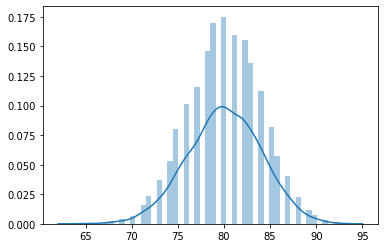

In [9]:
#@title #### Change the parameters to make the standard deviation lower than 4

n=100 #@param {type:"integer"} number of flips
p=0.8 #@param {type:"number"} probability of heads
size=10000 #@param {type:"number"} number of experiments
b = np.random.binomial(n=n, p=p, size=size)

sns.distplot(b)
print("Standard Deviation:",np.std(b))
plt.show()

#### How to interpret probability as a frequency distribution

If we conducted a 100 flip experiment 10000 times, we would expect to see 50 heads about 800 times, so the likelihood of seeing exactly 50 heads is about 8%

## Estimation

If we have a biased coin, how could we estimate the probability of getting, say, k heads?

The Probability Mass Function (PMF) allows us to calculate the probability of a distinct set of outcomes for an experiment with a predetermined number of trials. For example, we can use the PMF to estimate the probability of getting *k heads* over *n tosses*, given that P(heads) = p, i.e., the probability of heads is p.


The function states that the probability of having an outcome exactly equal to k given that the probability of that event is p and the number of trials is n is equal to: the combination of n,k multiplied by p to the kth power, where p is the known probability, multiplied by 1 minus p to the n minus kth power.

$P(k | p,n) = \binom{n}{k} (p)^{k}(1-p)^{n-k}$


## Resources

 <a href="http://www.greenteapress.com/thinkstats/"><img height="150px" src="http://www.greenteapress.com/thinkstats/think_stats_comp.png" align="left" hspace="100px" vspace="10px">
<a/>
 


 <a href="https://greenteapress.com/wp/think-bayes/"><img height="150px" src="http://www.greenteapress.com/thinkbayes/think_bayes_cover_medium.png" align="left" hspace="100px" vspace="10px">
<a/>




# Exercises

## Exercise 1

Create a function that executes a coin flip experiment (e.g., flips a hundred coins, 1000 times),  and a second that visualizes the results (how many times n heads occurred)with a barplot.





### Student Solution

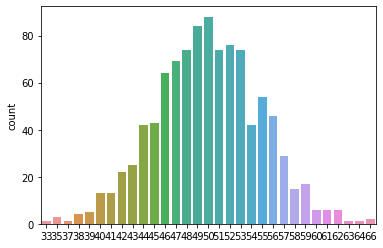

In [10]:
b = np.random.binomial(n=100, p=0.5, size=1000)
sns.countplot(b)



## Exercise 2

Use the Monte Carlo method to estimate the probability that a randomly-chosen point in the square $[-1,1] x [-1,1]$ lies in the unit circle.   Notice that this number approximates $\pi /4$.

### Student Solution

In [11]:
# Your answer goes here
sum([1 for x,y in 2 * np.random.rand(10000, 2) - 1 if (np.sqrt(x**2 + y**2) < 1)])/10000
 

0.7921

## Exercise 3

Code an experiment where you draw a first, then draw a second marble and replace them after, and visualize the results for 1000 draws with a barplot.

### Student Solution

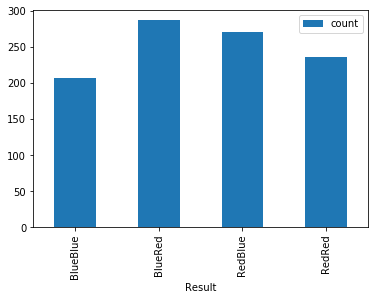

In [12]:
# Your Answer Goes Here
Bag=5*['Red']+5*['Blue']
BagR=4*['Red']+5*['Blue']
BagB=5*['Red']+4*['Blue']

def choose_bag(Bag):
  if 'Red' == np.random.choice(Bag):
    return ['Red'+ np.random.choice(BagR)]
  else:
    return ['Blue'+ np.random.choice(BagB)]

b = pd.DataFrame([choose_bag(Bag) for i in range(1000)],columns=['Result'])
b['count']=1
data = b.groupby('Result').sum()
ax = data.plot.bar()

## Exercise 4

Use the plot below to visually estimate the probability of flipping exactly 50 heads.

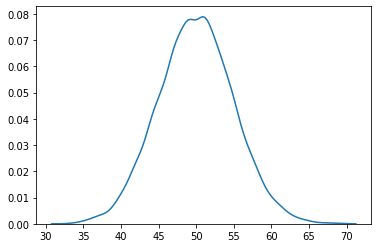

In [13]:
random.seed(0)
sns.distplot(np.random.binomial(n=100, p=0.5, size=10000), hist=False)
plt.show()

### Student Solution

In [14]:
# Your Answer Goes Here
answer = 0.08

## Exercise 5: Probability Mass Function

The chance of getting $k$ heads in $n$ tosses from a coin that has $p$ probability of turning up heads can be calculated as follows:

$P(k | p,n) = \binom{n}{k} (p)^{k}(1-p)^{n-k}$

*** *hint look at [SciPy](https://docs.scipy.org)***
🔬🐍

Suppose you have two coins: one has $p = .7$, the other $p = .5$.  Code the formula above and calculate the likelihood of exactly 55 heads in a 100 coin toss experiment.  Suppose you choose a coin at random and get 55 heads: what is the probability that your coin is the fair one?



### Student Solution

In [15]:
# Your answer goes here
from scipy.stats import binom

b1 = binom.pmf(55,n=100,p=0.7)
b2 = binom.pmf(55,n=100,p=0.5)
answer = (0.5*b2)/((0.5*b2)+(0.5*b1))
answer
# answer = 'some float'

0.9888066621223974

## Challenge: Monty Hall Problem


In the Monty Hall problem there are 3 doors to choose from. 1 of the doors has a prize, and the other two have goats behind them.  You first choose a door; the host (Monty Hall) then opens one of the two remaining doors, revealing a goat.  You then have the option of sticking with your original door or switching to the remaining door.

Use the Monte Carlo method to get an estimate of your chance of success if you stick with your original door (i.e., model the game and run it a large number of times to see what percent of the time you win).  Extra challenge: change the number of total doors and number of doors opened.

<a href="https://commons.wikimedia.org/wiki/File:Monty_open_door.svg#/media/File:Monty_open_door.svg"><img align="center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/1200px-Monty_open_door.svg.png" alt="Monty open door.svg" height="100px"><a/>

### Student Solution

In [16]:
# Your answer goes here
import numpy as np

def goatdoors(guesses, prizes):
  return [np.setdiff1d([0, 1, 2], [prizes[i], guesses[i]])[0] for i in range(len(prizes))]

def switch(guesses, goatdoors):
  return [np.setdiff1d([0, 1, 2], [guesses[i], goatdoors[i]])[0] for i in range(len(guesses))]

def win_pert(guesses, prizes):
  count = 0
  for i in range(len(guesses)):
    if guesses[i] == prizes[i]:
                count += 1
  return 100.0 * count / float(len(guesses))


N = 100000
prizes = np.random.randint(0, 3, size=N)
guesses = np.random.randint(0, 3, size=N)
non_swtich = win_pert(guesses, prizes)
print("Wins without switching " + str(non_swtich))

prizes = np.random.randint(0, 3, size=N)
guesses = np.random.randint(0, 3, size=N)
goatdoors = goatdoors(guesses, prizes)
swtich = win_pert(switch(guesses, goatdoors), prizes)
print("Wins with switching " +str(swtich))




Wins without switching 33.593
Wins with switching 66.708
